In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/Users/timvalencony/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
def _read_data(path):
    _target_column_name = 'log_bike_count'
    data = pd.read_parquet(path)
    # Sort by date first, so that time based cross-validation would produce correct results
    data = data.sort_values(["date", "counter_name"])
    y_array = data[_target_column_name].values
    X_df = data.drop([_target_column_name, "bike_count"], axis=1)
    return X_df, y_array

In [3]:
X_final = pd.read_parquet('../../data/final_test.parquet')

In [4]:
X_final

counter_id                counter_name    site_id  \
0      100007049-102007049    28 boulevard Diderot E-O  100007049   
1      100007049-102007049    28 boulevard Diderot E-O  100007049   
2      100007049-102007049    28 boulevard Diderot E-O  100007049   
3      100007049-102007049    28 boulevard Diderot E-O  100007049   
4      100007049-102007049    28 boulevard Diderot E-O  100007049   
...                    ...                         ...        ...   
51435  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
51436  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
51437  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
51438  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
51439  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   

                  site_name                date counter_installation_date  \
0      28 boulevard Diderot 2021-09-10 01:00:00                2013-01-18   
1      28 boulevard Diderot 2021-09-10 13:00:00                2013-01-18   
2      28 boulevard Diderot 2021-09-10 17:00:00                2013-01-18   
3      28 boulevard Diderot 2021-09-10 19:00:00                2013-01-18   
4      28 boulevard Diderot 2021-09-10 22:00:00                2013-01-18   
...                     ...                 ...                       ...   
51435  254 rue de Vaugirard 2021-10-18 11:00:00                2020-11-29   
51436  254 rue de Vaugirard 2021-10-18 15:00:00                2020-11-29   
51437  254 rue de Vaugirard 2021-10-18 17:00:00                2020-11-29   
51438  254 rue de Vaugirard 2021-10-18 18:00:00                2020-11-29   
51439  254 rue de Vaugirard 2021-10-18 19:00:00                2020-11-29   

              coordinates counter_technical_id   latitude  longitude  
0      48.846028,2.375429          Y2H15027244  48.846028   2.375429  
1      48.846028,2.375429          Y2H15027244  48.846028   2.375429  
2      48.846028,2.375429          Y2H15027244  48.846028   2.375429  
3      48.846028,2.375429          Y2H15027244  48.846028   2.375429  
4      48.846028,2.375429          Y2H15027244  48.846028   2.375429  
...                   ...                  ...        ...        ...  
51435    48.83977,2.30198          Y2H20114504  48.839770   2.301980  
51436    48.83977,2.30198          Y2H20114504  48.839770   2.301980  
51437    48.83977,2.30198          Y2H20114504  48.839770   2.301980  
51438    48.83977,2.30198          Y2H20114504  48.839770   2.301980  
51439    48.83977,2.30198          Y2H20114504  48.839770   2.301980  

[51440 rows x 10 columns]

In [6]:
y_pred = pd.read_csv('submission.csv')

In [7]:
final_sub = X_final.copy()
final_sub['log_bike_count'] = y_pred['log_bike_count']
final_sub

counter_id                counter_name    site_id  \
0      100007049-102007049    28 boulevard Diderot E-O  100007049   
1      100007049-102007049    28 boulevard Diderot E-O  100007049   
2      100007049-102007049    28 boulevard Diderot E-O  100007049   
3      100007049-102007049    28 boulevard Diderot E-O  100007049   
4      100007049-102007049    28 boulevard Diderot E-O  100007049   
...                    ...                         ...        ...   
51435  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
51436  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
51437  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
51438  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
51439  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   

                  site_name                date counter_installation_date  \
0      28 boulevard Diderot 2021-09-10 01:00:00                2013-01-18   
1      28 boulevard Diderot 2021-09-10 13:00:00                2013-01-18   
2      28 boulevard Diderot 2021-09-10 17:00:00                2013-01-18   
3      28 boulevard Diderot 2021-09-10 19:00:00                2013-01-18   
4      28 boulevard Diderot 2021-09-10 22:00:00                2013-01-18   
...                     ...                 ...                       ...   
51435  254 rue de Vaugirard 2021-10-18 11:00:00                2020-11-29   
51436  254 rue de Vaugirard 2021-10-18 15:00:00                2020-11-29   
51437  254 rue de Vaugirard 2021-10-18 17:00:00                2020-11-29   
51438  254 rue de Vaugirard 2021-10-18 18:00:00                2020-11-29   
51439  254 rue de Vaugirard 2021-10-18 19:00:00                2020-11-29   

              coordinates counter_technical_id   latitude  longitude  \
0      48.846028,2.375429          Y2H15027244  48.846028   2.375429   
1      48.846028,2.375429          Y2H15027244  48.846028   2.375429   
2      48.846028,2.375429          Y2H15027244  48.846028   2.375429   
3      48.846028,2.375429          Y2H15027244  48.846028   2.375429   
4      48.846028,2.375429          Y2H15027244  48.846028   2.375429   
...                   ...                  ...        ...        ...   
51435    48.83977,2.30198          Y2H20114504  48.839770   2.301980   
51436    48.83977,2.30198          Y2H20114504  48.839770   2.301980   
51437    48.83977,2.30198          Y2H20114504  48.839770   2.301980   
51438    48.83977,2.30198          Y2H20114504  48.839770   2.301980   
51439    48.83977,2.30198          Y2H20114504  48.839770   2.301980   

       log_bike_count  
0            0.301644  
1            1.678756  
2            1.963889  
3            0.804989  
4            1.007675  
...               ...  
51435        4.674000  
51436        5.051529  
51437        5.315272  
51438        4.560507  
51439        3.649646  

[51440 rows x 11 columns]

In [8]:
final_sub["counter_name"].unique()

['28 boulevard Diderot E-O', '28 boulevard Diderot O-E', '39 quai François Mauriac NO-SE', '39 quai François Mauriac SE-NO', '18 quai de l'Hôtel de Ville NO-SE', ..., '90 Rue De Sèvres SO-NE', '20 Avenue de Clichy NO-SE', '20 Avenue de Clichy SE-NO', '254 rue de Vaugirard NE-SO', '254 rue de Vaugirard SO-NE']
Length: 56
Categories (56, object): ['152 boulevard du Montparnasse E-O', '152 boulevard du Montparnasse O-E', '18 quai de l'Hôtel de Ville NO-SE', '18 quai de l'Hôtel de Ville SE-NO', ..., 'Totem Cours la Reine E-O', 'Totem Cours la Reine O-E', 'Voie Georges Pompidou NE-SO', 'Voie Georges Pompidou SO-NE']

In [9]:
final_sub[final_sub["counter_name"]=='28 boulevard Diderot E-O']

counter_id              counter_name    site_id  \
0    100007049-102007049  28 boulevard Diderot E-O  100007049   
1    100007049-102007049  28 boulevard Diderot E-O  100007049   
2    100007049-102007049  28 boulevard Diderot E-O  100007049   
3    100007049-102007049  28 boulevard Diderot E-O  100007049   
4    100007049-102007049  28 boulevard Diderot E-O  100007049   
..                   ...                       ...        ...   
624  100007049-102007049  28 boulevard Diderot E-O  100007049   
625  100007049-102007049  28 boulevard Diderot E-O  100007049   
626  100007049-102007049  28 boulevard Diderot E-O  100007049   
627  100007049-102007049  28 boulevard Diderot E-O  100007049   
628  100007049-102007049  28 boulevard Diderot E-O  100007049   

                site_name                date counter_installation_date  \
0    28 boulevard Diderot 2021-09-10 01:00:00                2013-01-18   
1    28 boulevard Diderot 2021-09-10 13:00:00                2013-01-18   
2    28 boulevard Diderot 2021-09-10 17:00:00                2013-01-18   
3    28 boulevard Diderot 2021-09-10 19:00:00                2013-01-18   
4    28 boulevard Diderot 2021-09-10 22:00:00                2013-01-18   
..                    ...                 ...                       ...   
624  28 boulevard Diderot 2021-10-18 14:00:00                2013-01-18   
625  28 boulevard Diderot 2021-10-18 16:00:00                2013-01-18   
626  28 boulevard Diderot 2021-10-18 17:00:00                2013-01-18   
627  28 boulevard Diderot 2021-10-18 18:00:00                2013-01-18   
628  28 boulevard Diderot 2021-10-18 20:00:00                2013-01-18   

            coordinates counter_technical_id   latitude  longitude  \
0    48.846028,2.375429          Y2H15027244  48.846028   2.375429   
1    48.846028,2.375429          Y2H15027244  48.846028   2.375429   
2    48.846028,2.375429          Y2H15027244  48.846028   2.375429   
3    48.846028,2.375429          Y2H15027244  48.846028   2.375429   
4    48.846028,2.375429          Y2H15027244  48.846028   2.375429   
..                  ...                  ...        ...        ...   
624  48.846028,2.375429          Y2H15027244  48.846028   2.375429   
625  48.846028,2.375429          Y2H15027244  48.846028   2.375429   
626  48.846028,2.375429          Y2H15027244  48.846028   2.375429   
627  48.846028,2.375429          Y2H15027244  48.846028   2.375429   
628  48.846028,2.375429          Y2H15027244  48.846028   2.375429   

     log_bike_count  
0          0.301644  
1          1.678756  
2          1.963889  
3          0.804989  
4          1.007675  
..              ...  
624        1.576821  
625        2.223286  
626        2.041084  
627        1.175456  
628        0.673518  

[629 rows x 11 columns]

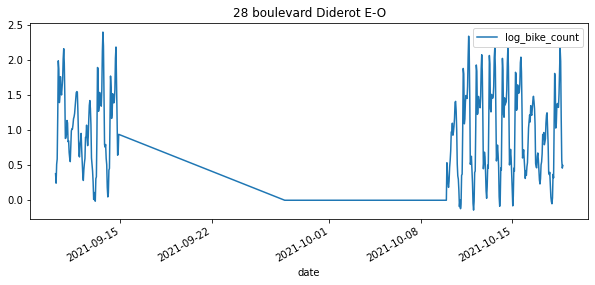

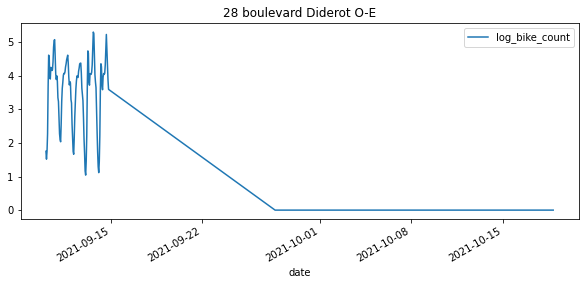

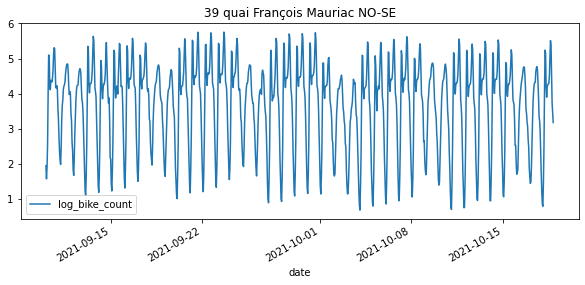

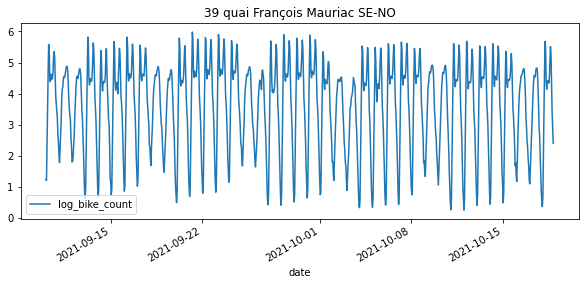

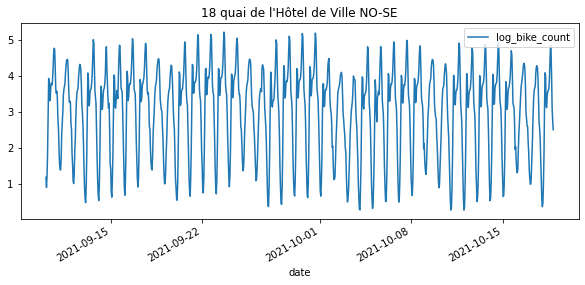

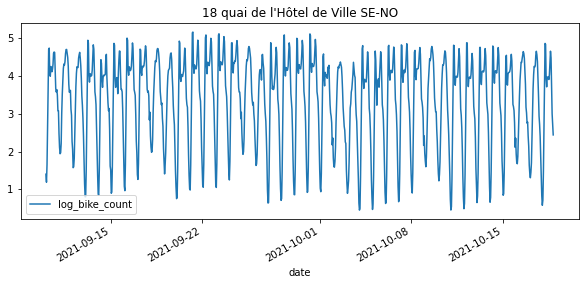

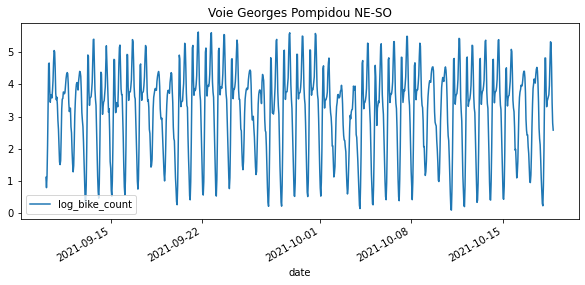

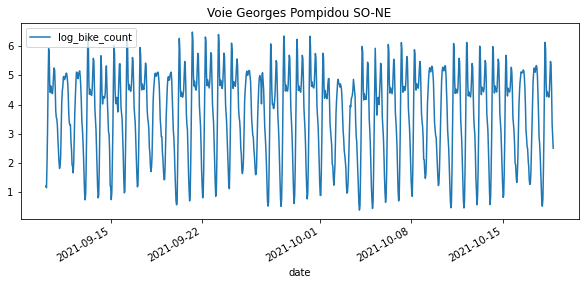

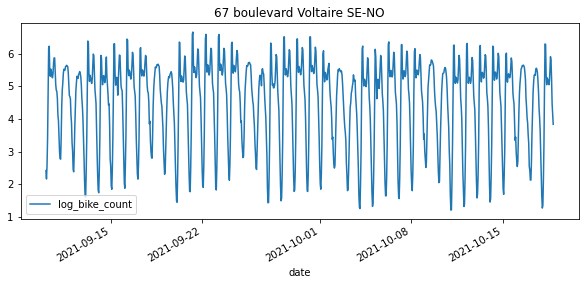

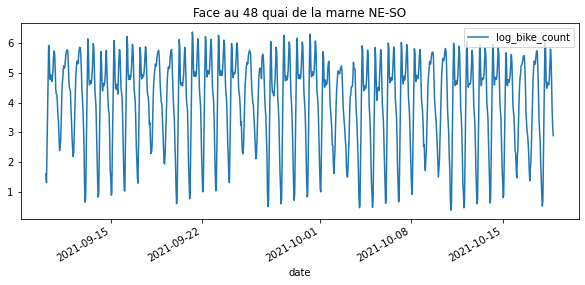

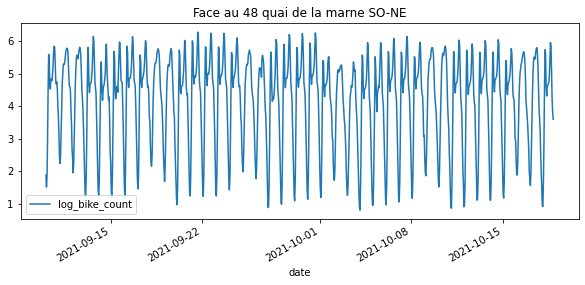

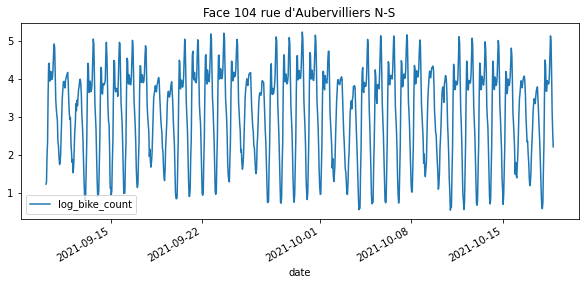

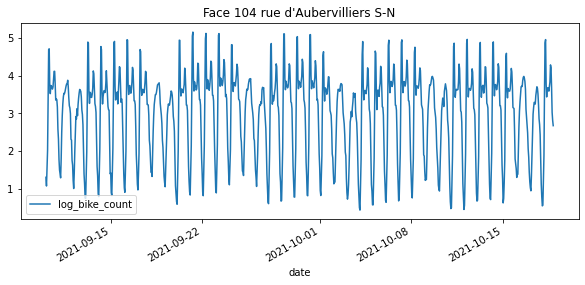

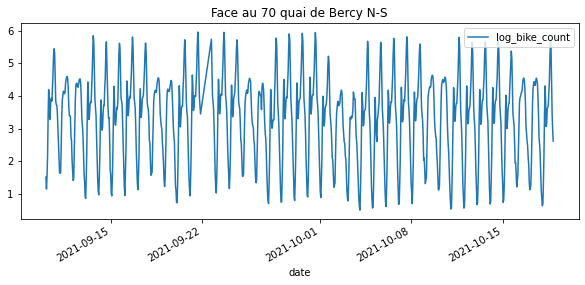

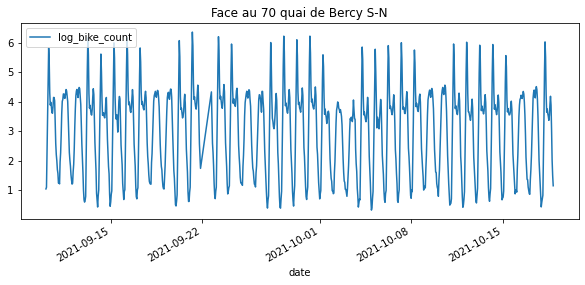

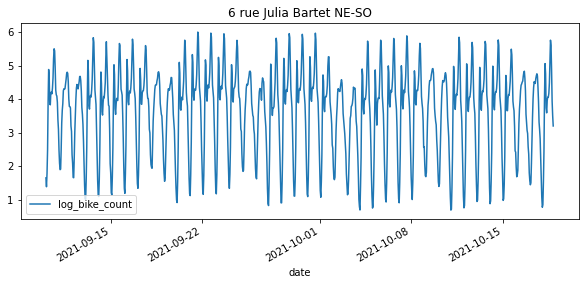

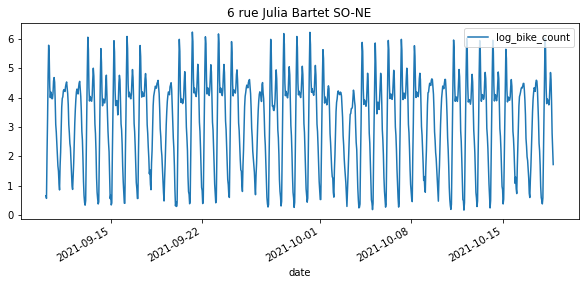

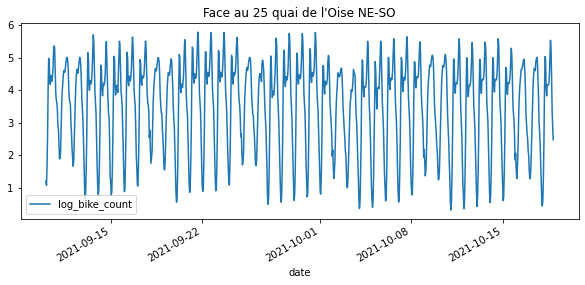

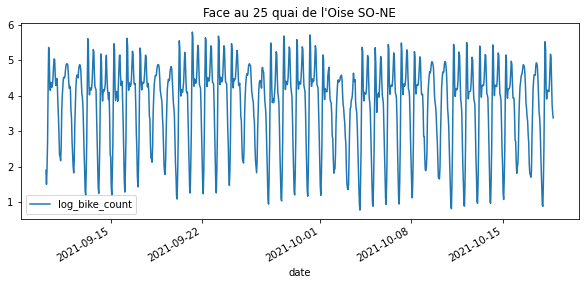

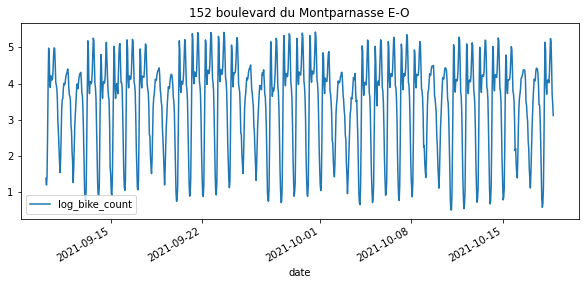

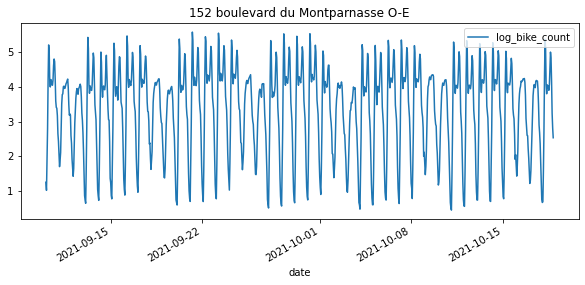

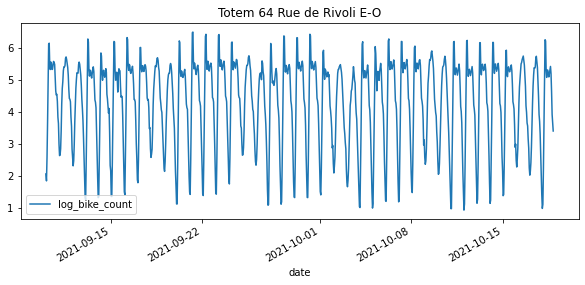

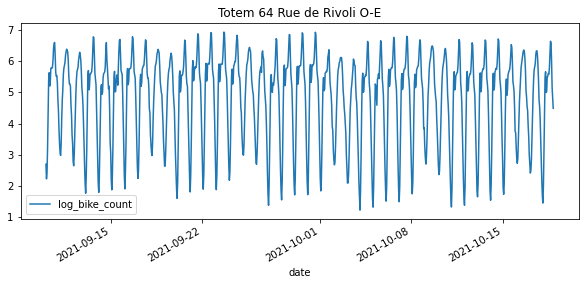

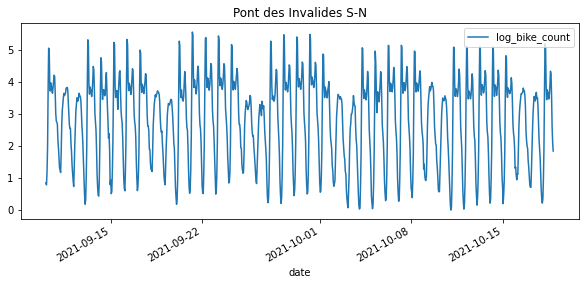

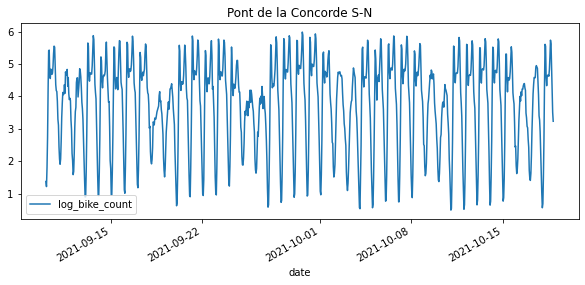

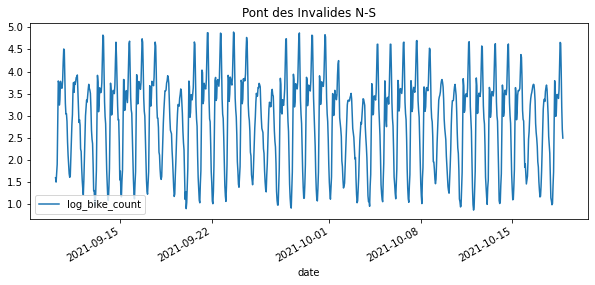

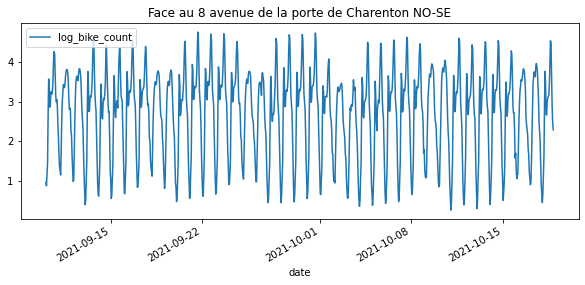

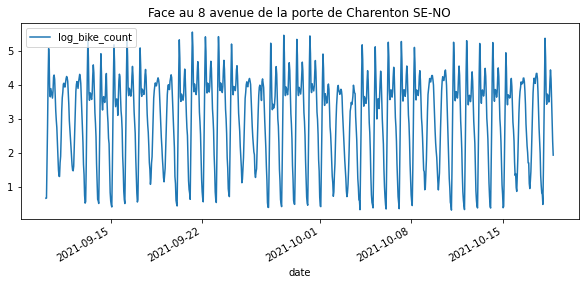

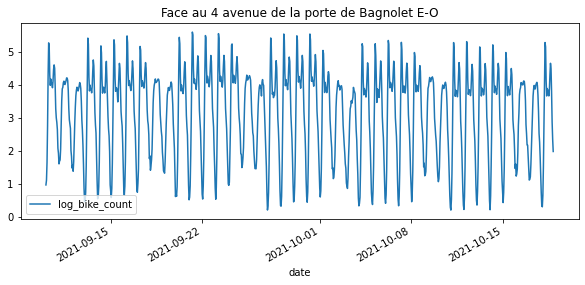

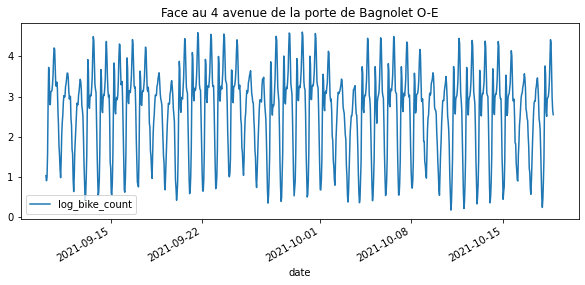

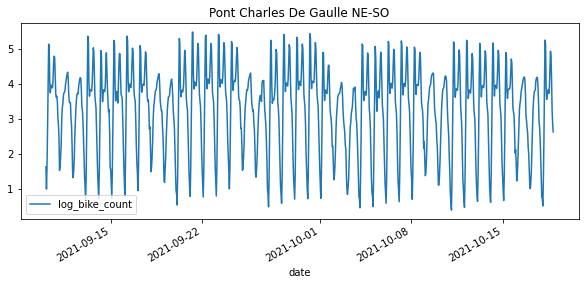

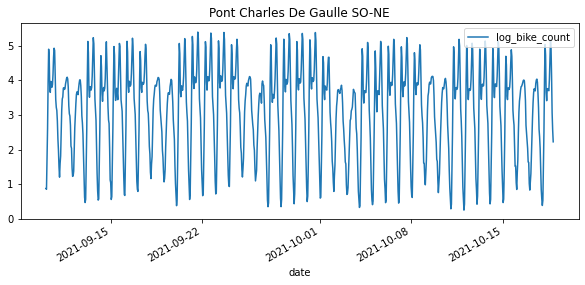

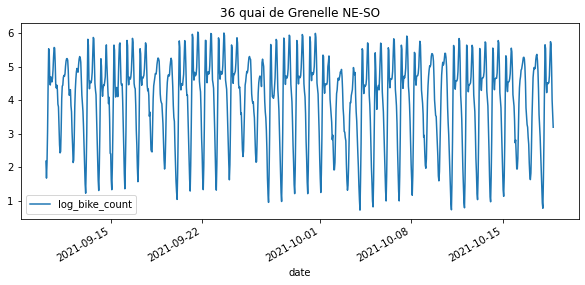

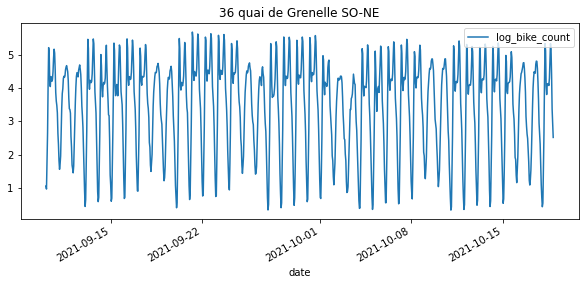

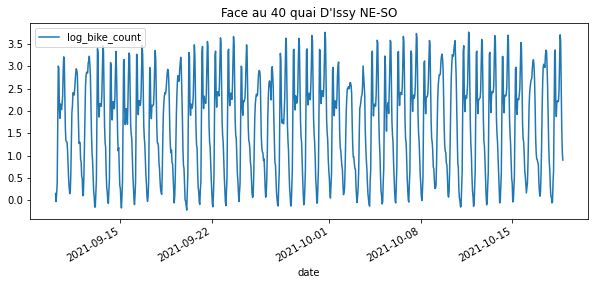

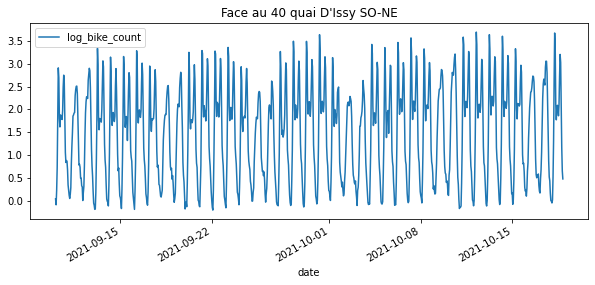

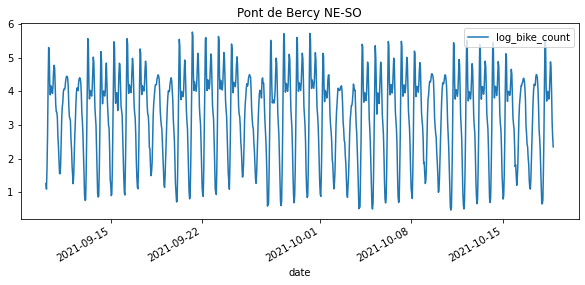

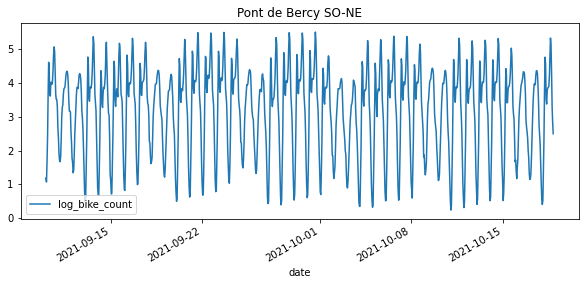

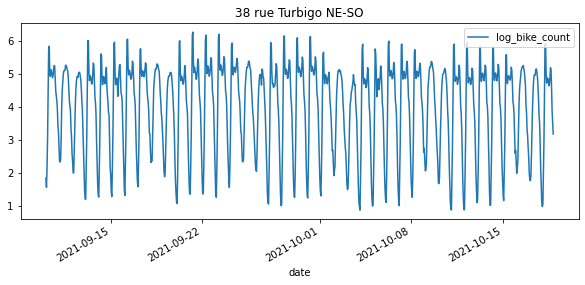

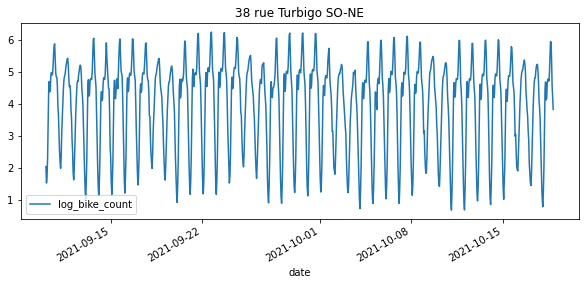

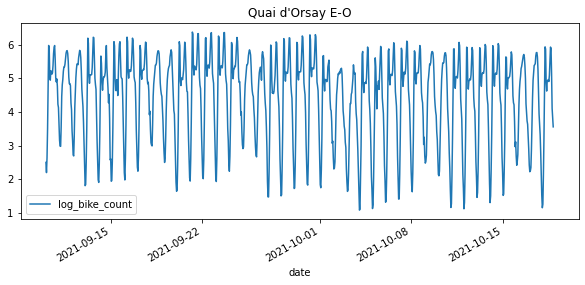

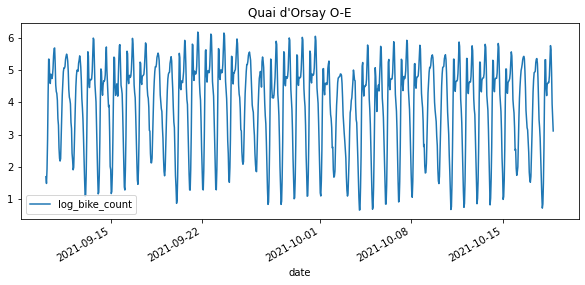

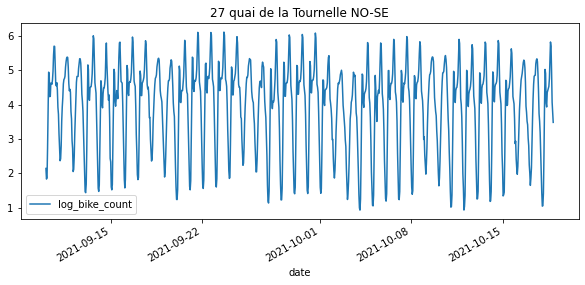

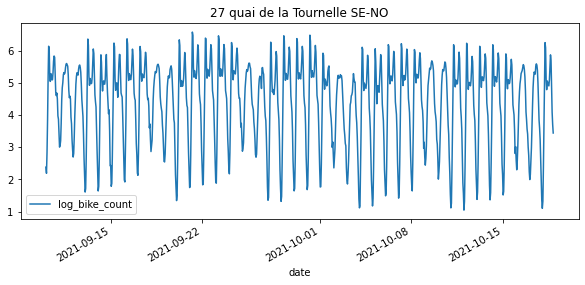

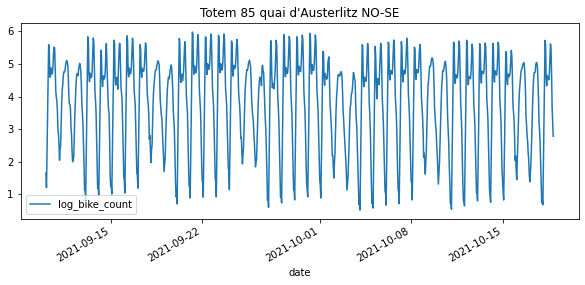

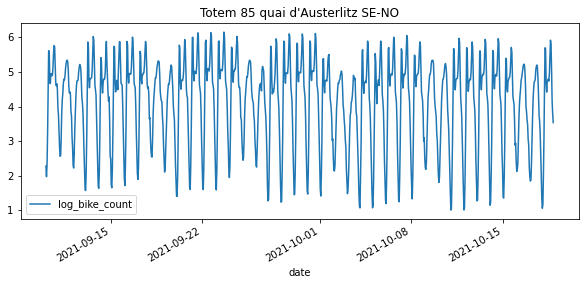

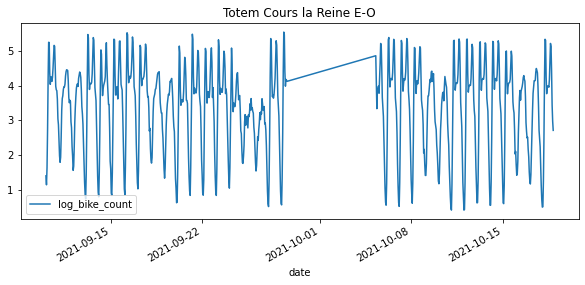

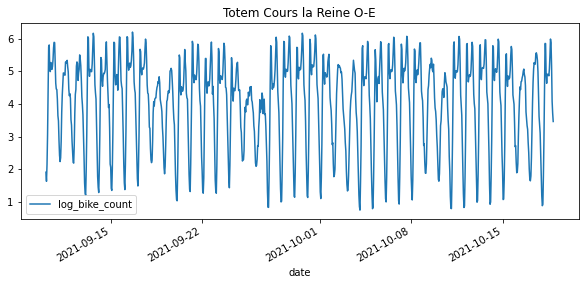

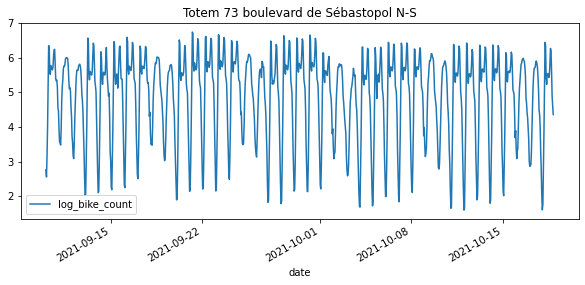

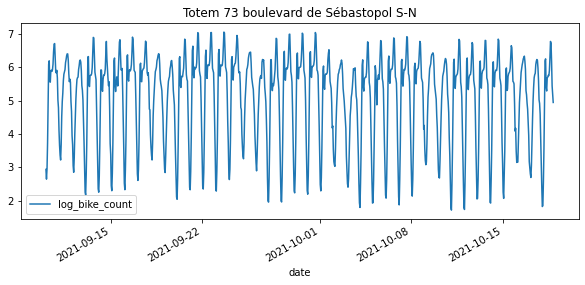

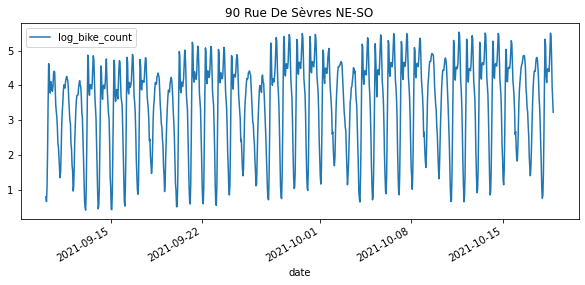

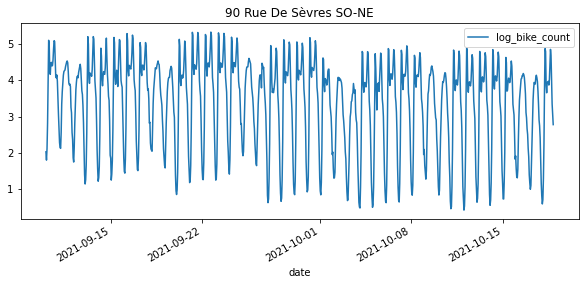

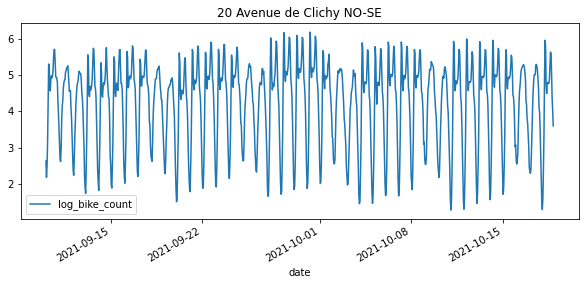

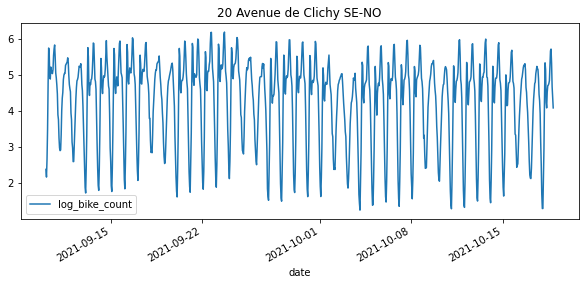

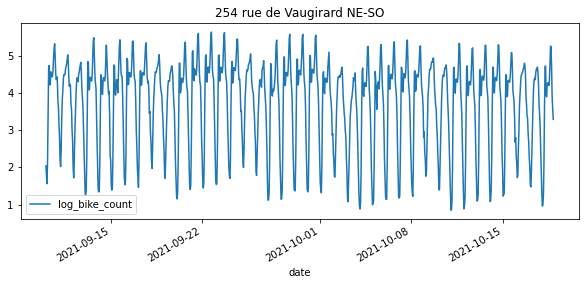

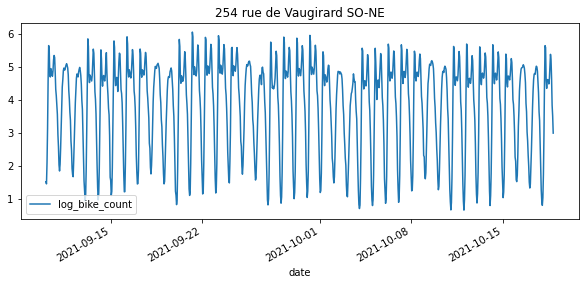

In [ ]:
for counter in final_sub["counter_name"].unique():
    fig, ax = plt.subplots(figsize=(10, 4))

    mask = (
        (final_sub["counter_name"] == counter)
        & (final_sub["date"] > pd.to_datetime("2021/12/31"))
        & (final_sub["date"] < pd.to_datetime("2021/12/31"))
    )

    final_sub[mask].plot(x="date", y="log_bike_count", ax=ax)
    plt.title(f'{counter}')
    plt.show()

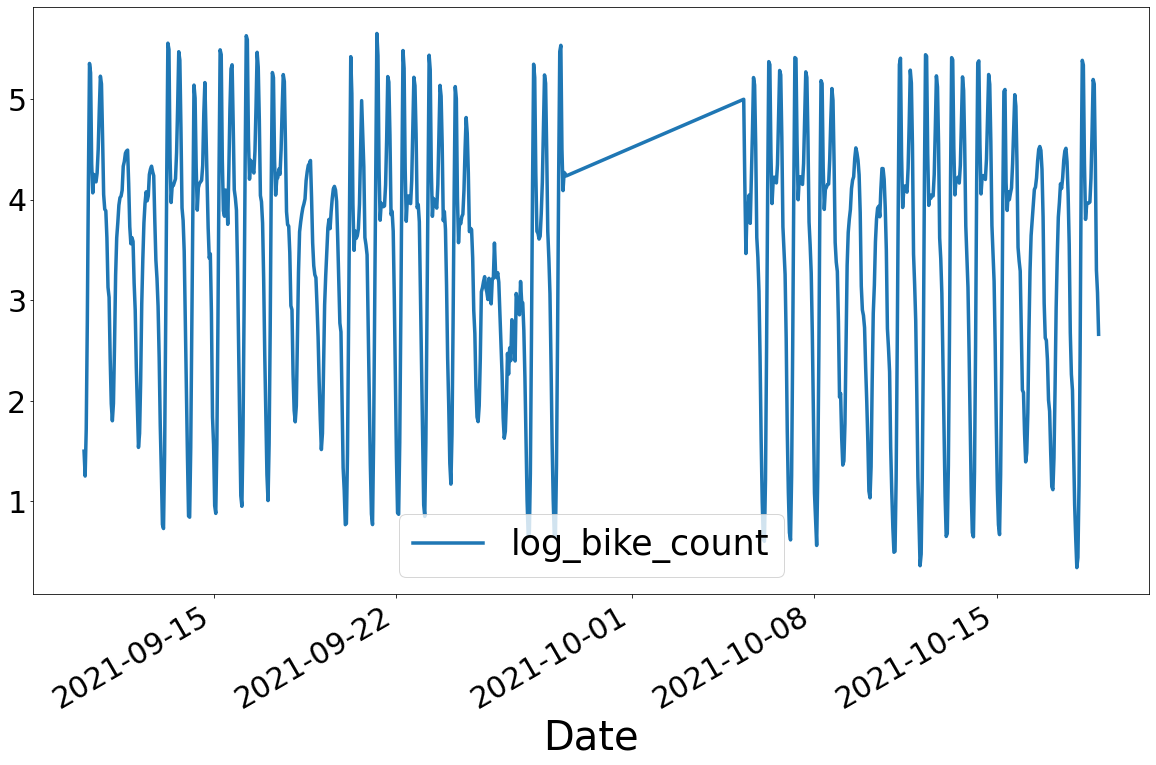

In [45]:
fig, ax = plt.subplots(figsize=(10, 4))

counter = 'Totem Cours la Reine E-O' # '28 boulevard Diderot O-E'

start_date = '2021/09/09'
end_date = '2021/12/31'

mask = (
    (final_sub["counter_name"] == counter)
    & (final_sub["date"] > pd.to_datetime(start_date))
    & (final_sub["date"] < pd.to_datetime(end_date))
)

final_sub[mask].plot(x="date", y="log_bike_count", ax=ax, fontsize=35, figsize=(20, 12), linewidth=3.5)
plt.xlabel('Date', fontsize=40)
plt.tick_params(axis='both', labelsize=30)
plt.legend(fontsize=35)
plt.savefig('totemEO.png', dpi=100)

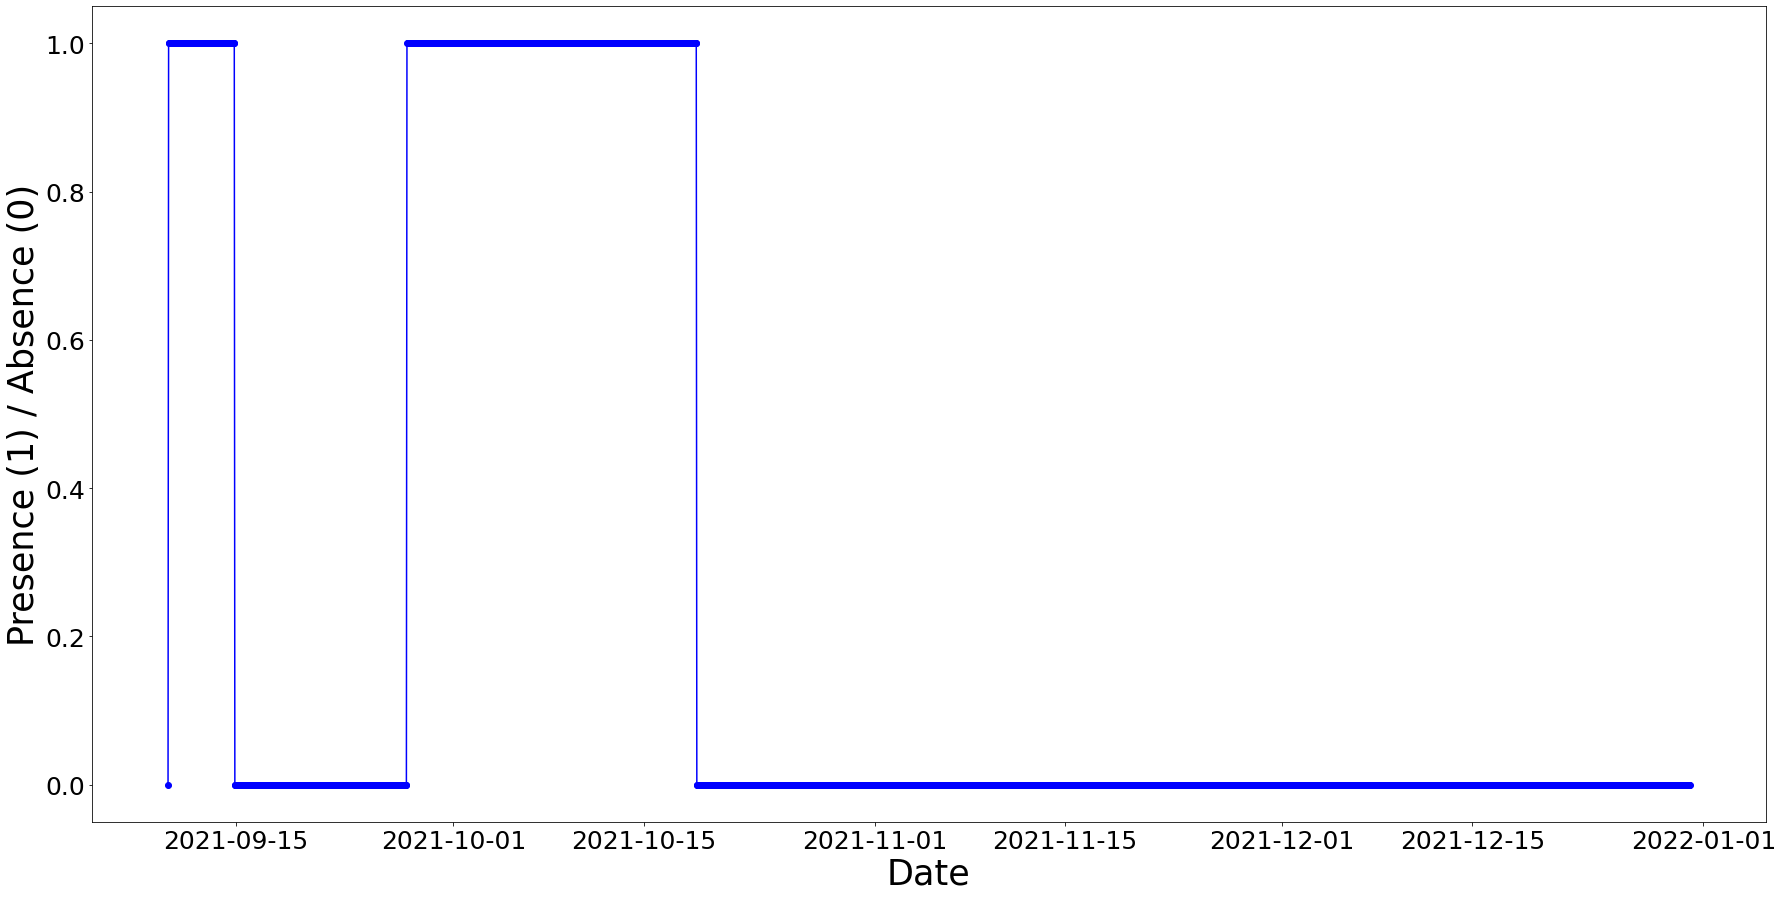

In [23]:
start_date = '2021-09-10'
end_date = '2021-12-31'

date_range = pd.date_range(start=start_date, end=end_date, freq='H')

# Filter the DataFrame for the specific counter_name
filtered_df = final_sub[final_sub["counter_name"] == 'Totem Cours la Reine E-O']

# Extract the unique dates from the filtered DataFrame
existing_dates = pd.to_datetime(filtered_df["date"]).dt.floor('H')

# Create a binary indicator column
date_indicator = pd.Series(1, index=existing_dates).reindex(date_range, fill_value=0)

# Plot the binary indicator
plt.figure(figsize=(30, 15))
plt.plot(date_indicator, marker='o', linestyle='-', color='b')
plt.xlabel('Date', fontsize=35)
plt.ylabel('Presence (1) / Absence (0)', fontsize=35)
plt.savefig('totemEO.png', dpi=100)

In [10]:
X_train, y_train = _read_data('../../data/train.parquet')
X_test, y_test = _read_data('../../data/test.parquet')

In [14]:
X_train = pd.concat([X_train, X_test], ignore_index=True, sort=False)
y_train = np.concatenate((y_train, y_test), axis=0)

train_data = X_train.copy()
train_data['log_bike_count'] = y_train

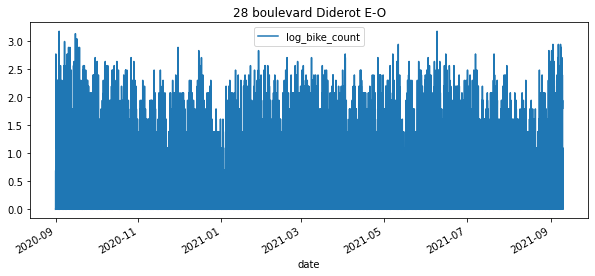

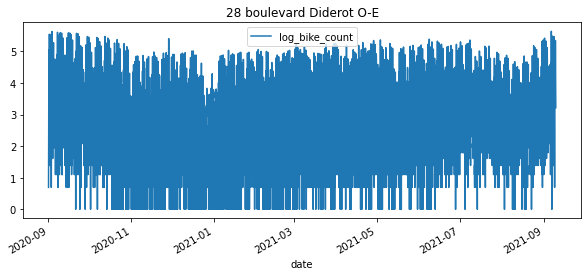

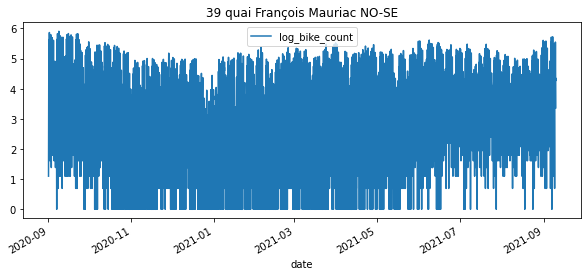

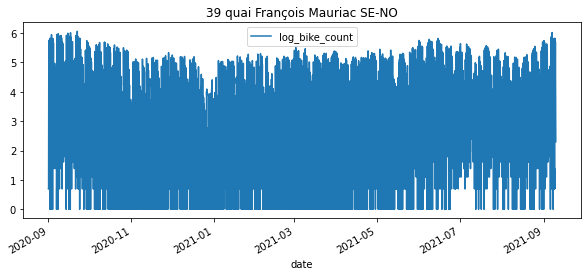

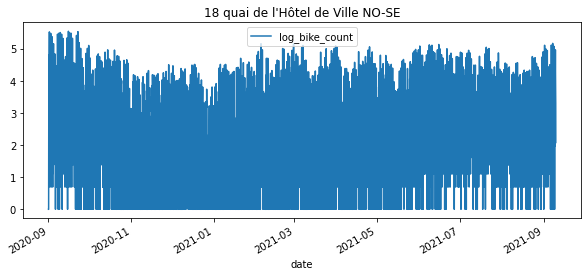

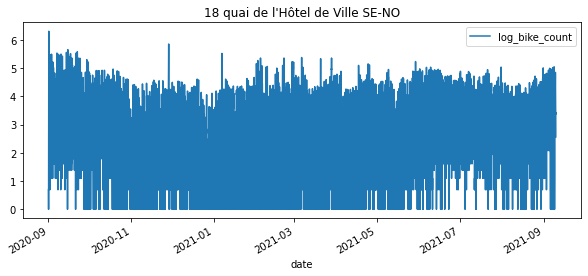

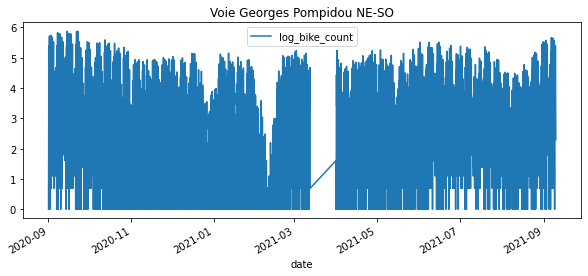

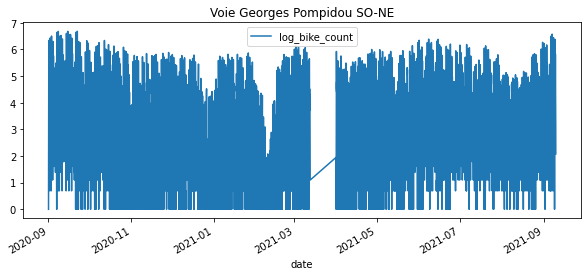

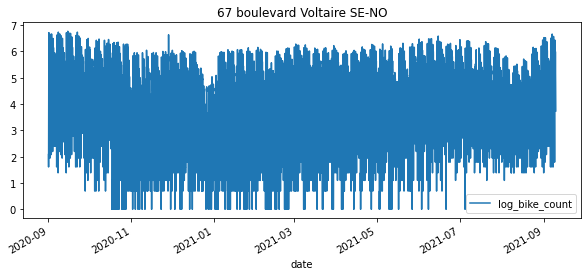

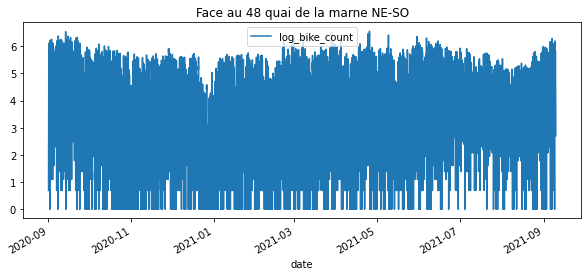

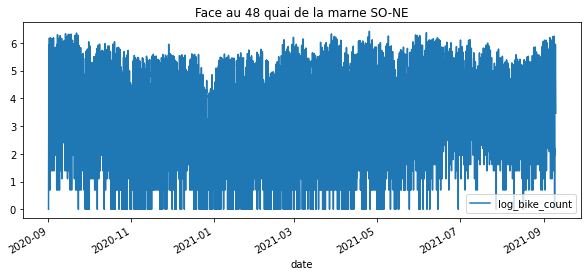

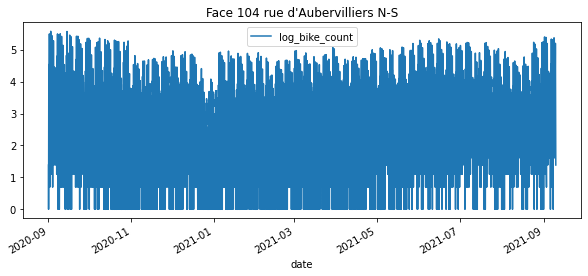

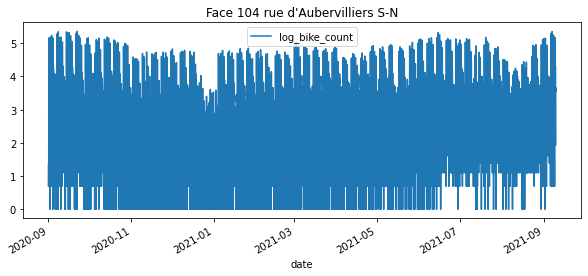

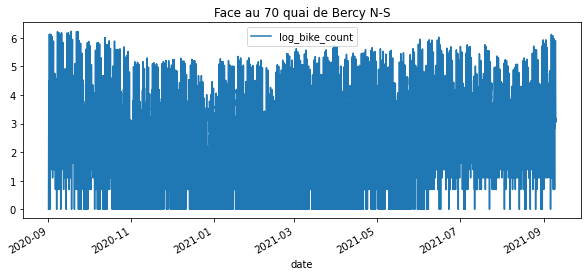

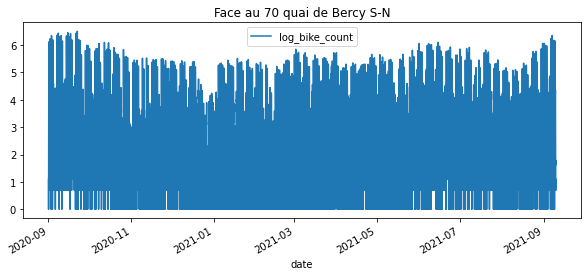

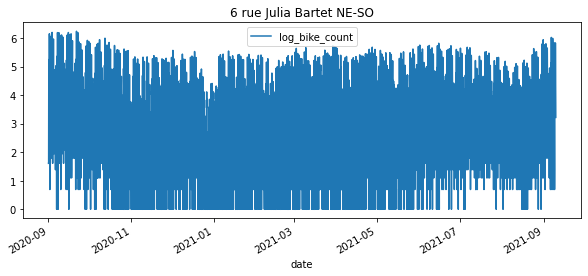

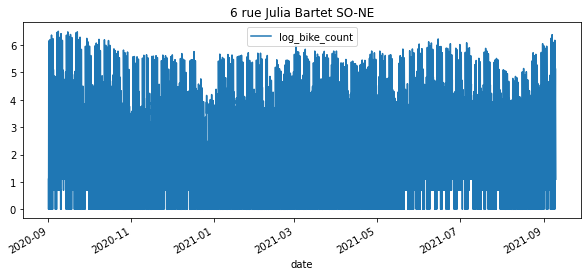

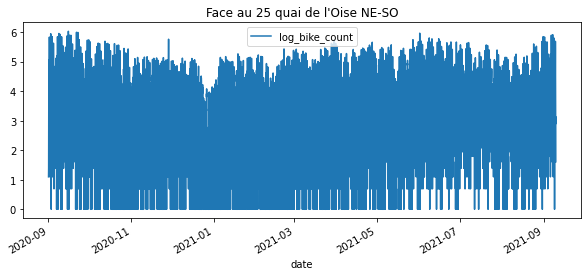

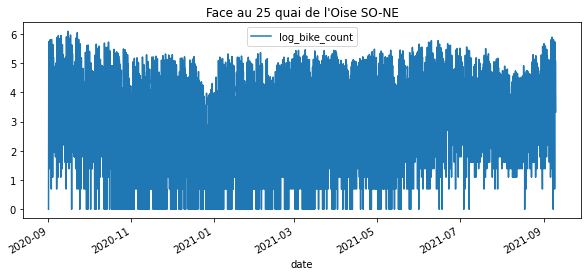

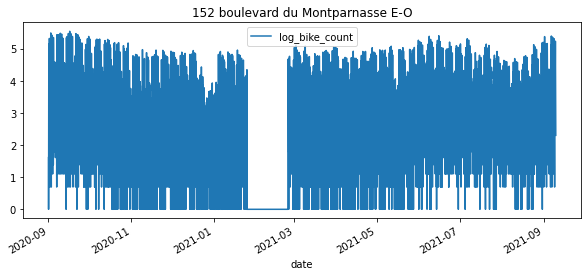

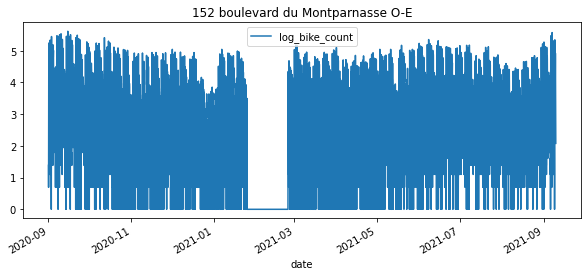

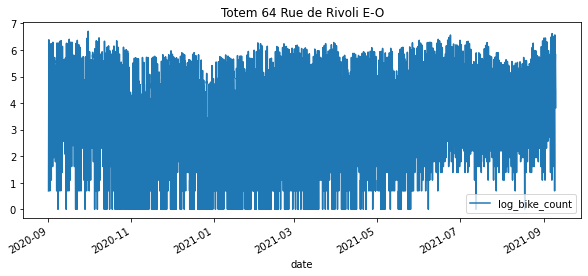

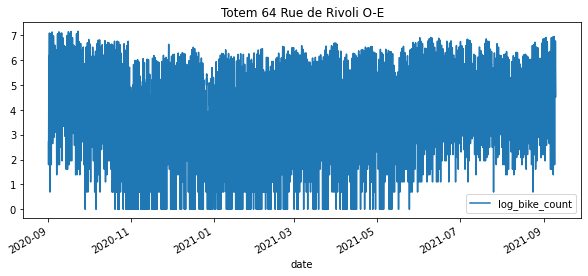

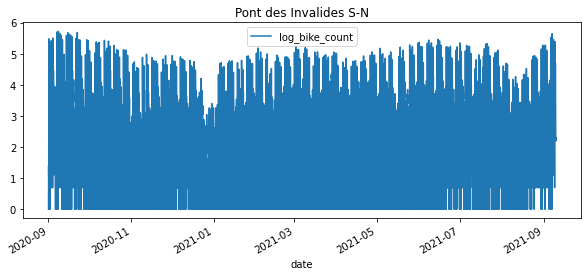

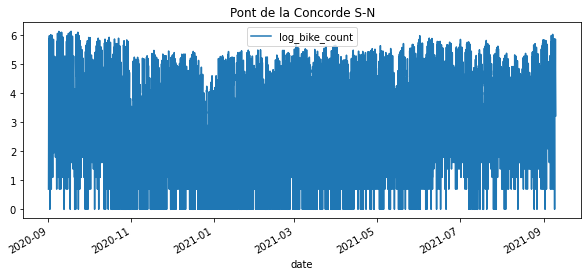

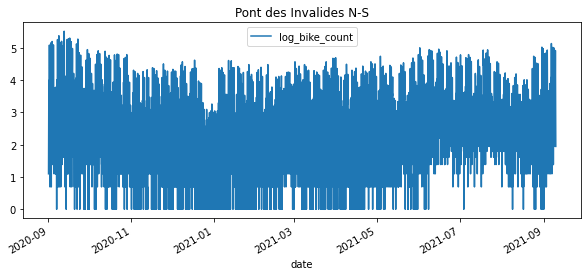

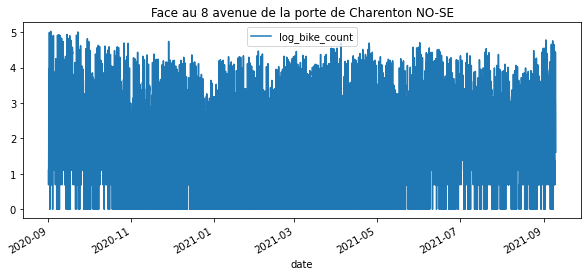

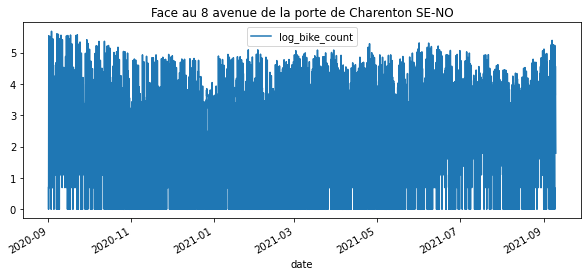

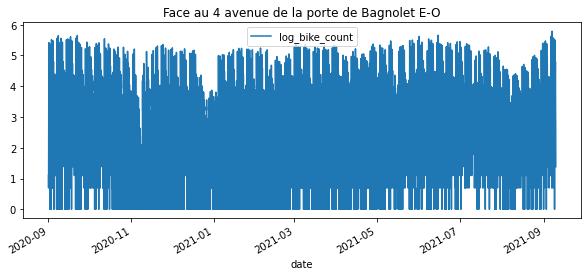

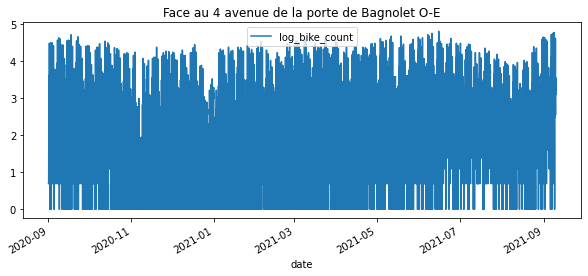

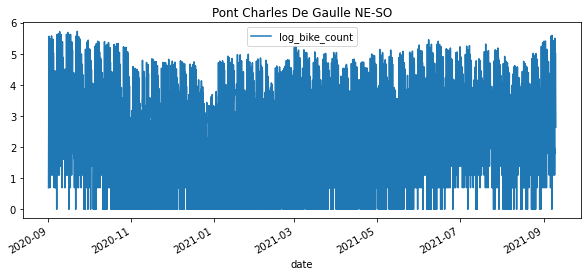

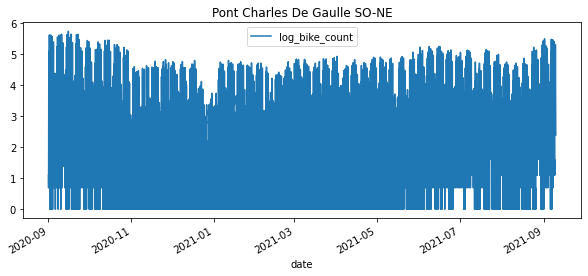

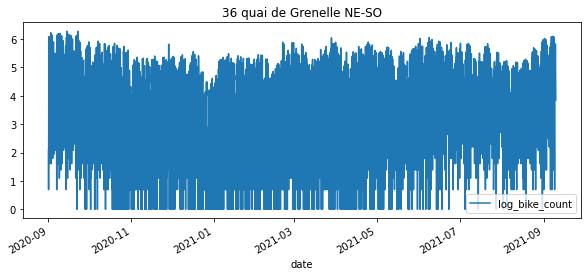

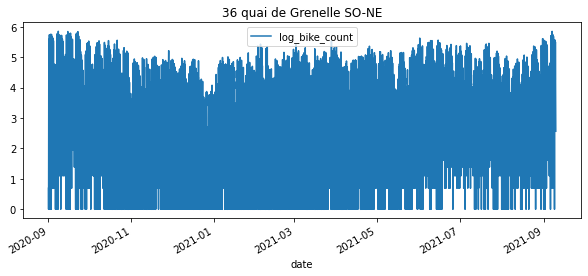

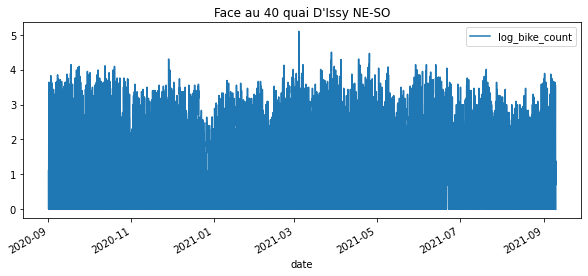

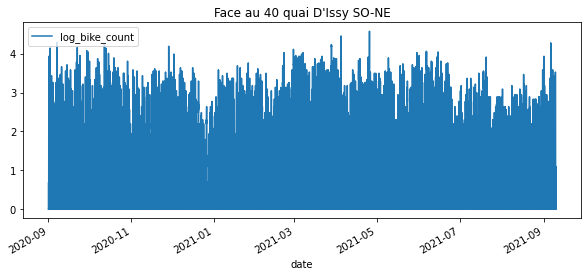

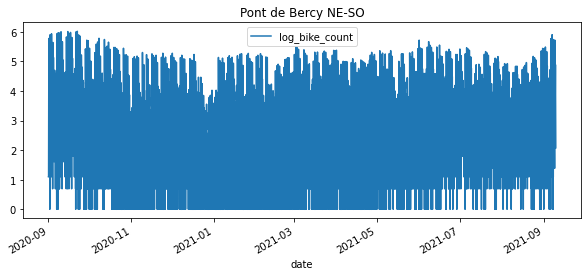

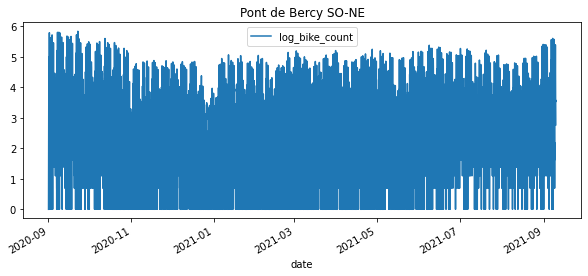

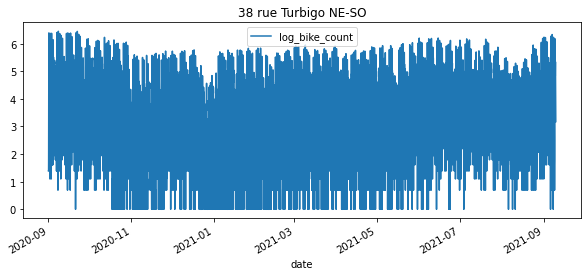

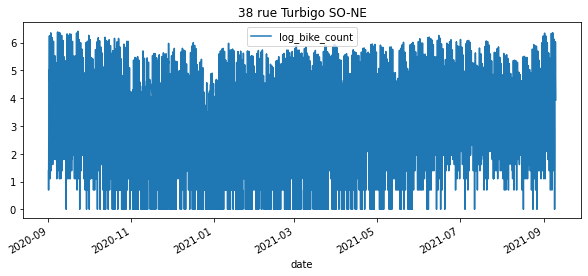

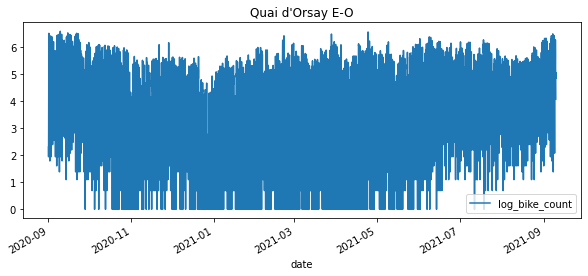

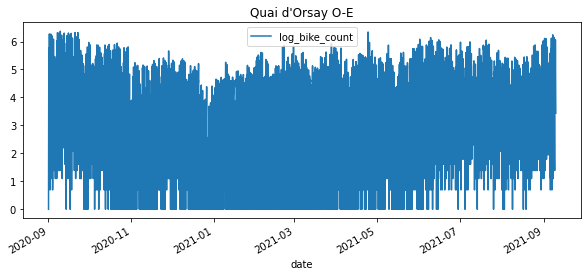

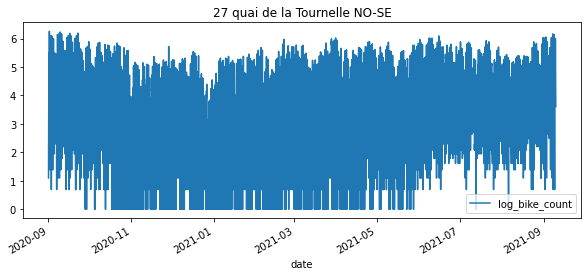

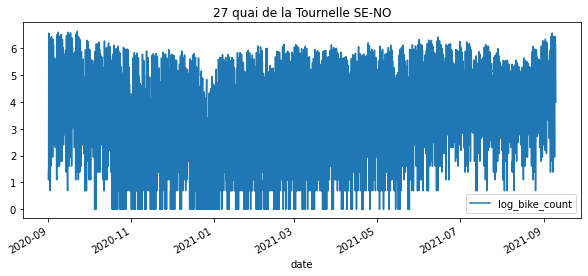

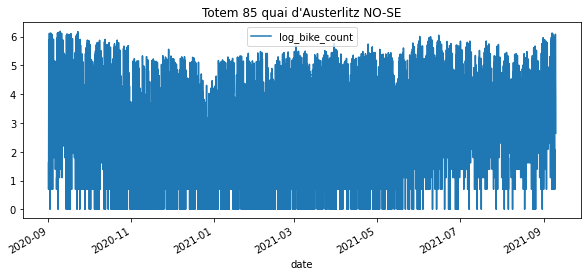

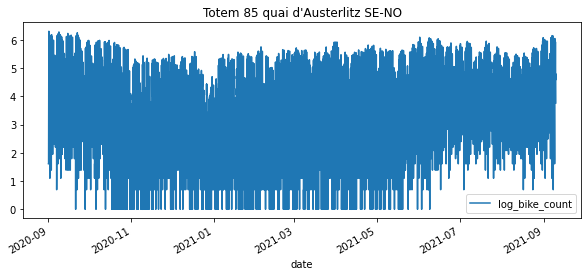

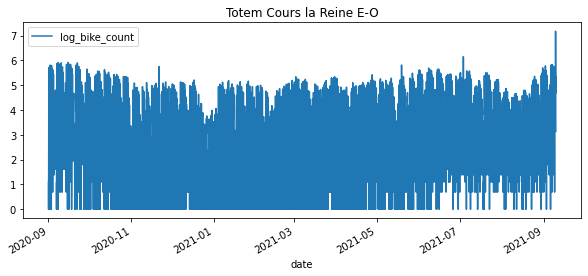

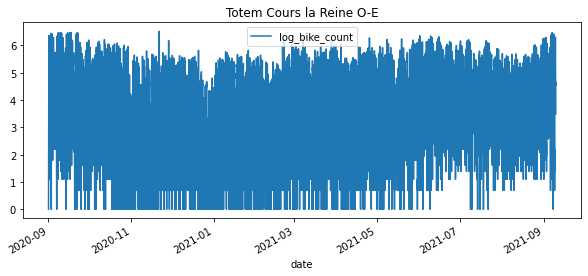

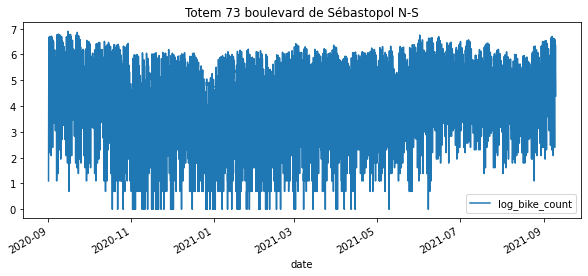

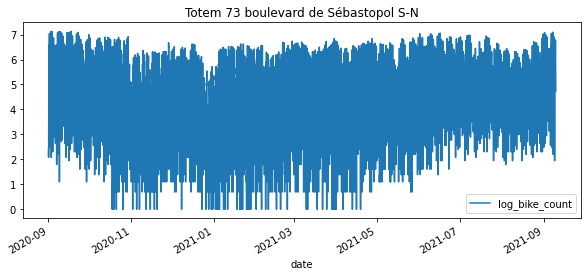

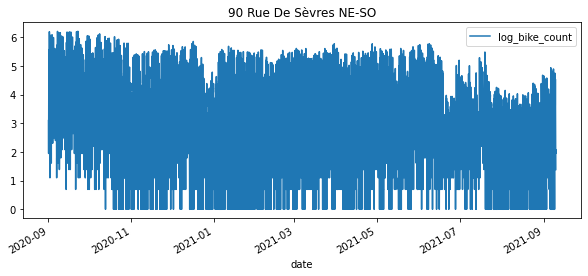

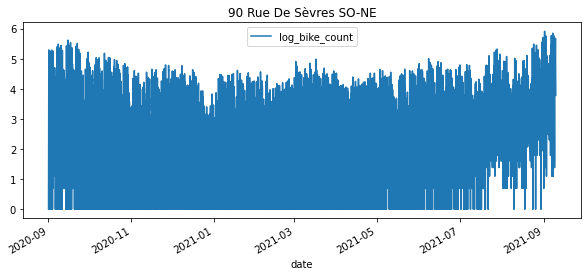

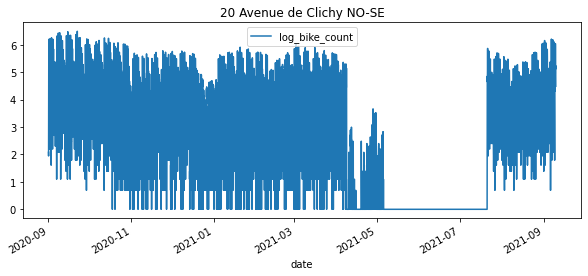

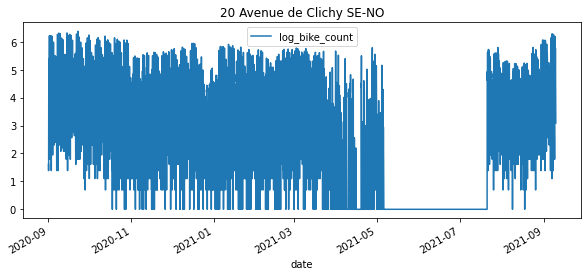

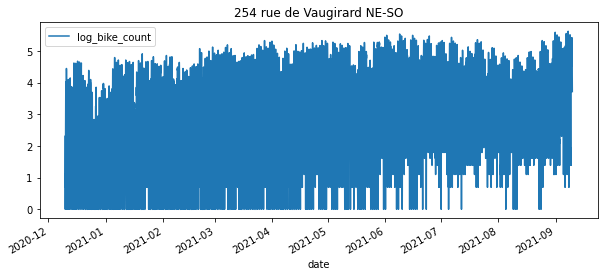

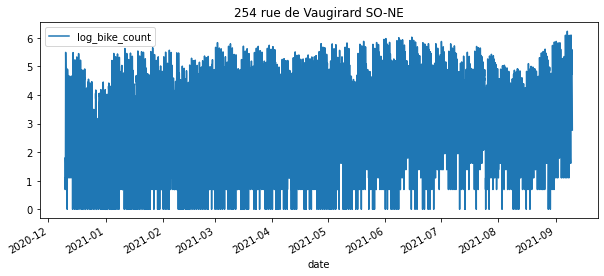

In [19]:
for counter in final_sub["counter_name"].unique():
    fig, ax = plt.subplots(figsize=(10, 4))

    mask = (
        (train_data["counter_name"] == counter)
        & (train_data["date"] > pd.to_datetime("2020/09/01"))
        & (train_data["date"] < pd.to_datetime("2021/12/31"))
    )

    train_data[mask].plot(x="date", y="log_bike_count", ax=ax)
    plt.title(f'{counter}')
    plt.show()

In [37]:
mask = (
        (train_data["counter_name"] == "20 Avenue de Clichy SE-NO")
        & (train_data["date"] > pd.to_datetime("2021/04/01"))
        & (train_data["date"] < pd.to_datetime("2021/07/01"))
    )

train_data[mask]['log_bike_count']

279160    0.000000
279216    0.693147
279272    0.693147
279328    2.079442
279384    2.302585
            ...   
401128    0.000000
401184    0.000000
401240    0.000000
401296    0.000000
401352    0.000000
Name: log_bike_count, Length: 2183, dtype: float64

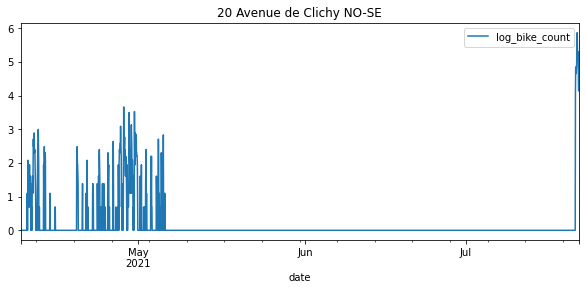

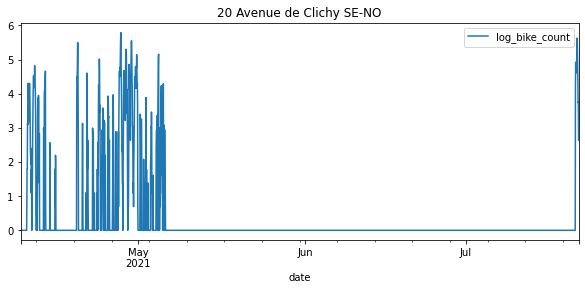

In [58]:
# ["152 boulevard du Montparnasse E-O", "152 boulevard du Montparnasse O-E"]

for counter in ["20 Avenue de Clichy NO-SE", "20 Avenue de Clichy SE-NO"]:
    fig, ax = plt.subplots(figsize=(10, 4))

    mask = (
        (train_data["counter_name"] == counter)
        & (train_data["date"] > pd.to_datetime("2021/04/09"))
        & (train_data["date"] < pd.to_datetime("2021/07/21"))
    )

    train_data[mask].plot(x="date", y="log_bike_count", ax=ax)
    plt.title(f'{counter}')
    plt.show()

In [63]:
test = train_data.copy()

counters_dict = {"20 Avenue de Clichy NO-SE":(pd.to_datetime("2021/04/09"), pd.to_datetime("2021/07/21")),
            "20 Avenue de Clichy SE-NO":(pd.to_datetime("2021/04/09"), pd.to_datetime("2021/07/21")),
            "152 boulevard du Montparnasse E-O":(pd.to_datetime("2021/01/26"), pd.to_datetime("2021/02/24")),
            "152 boulevard du Montparnasse O-E":(pd.to_datetime("2021/01/26"), pd.to_datetime("2021/02/24"))}

for counter, (start, end) in counters_dict.items():
    mask = (
        (test["counter_name"] == counter)
        & (test["date"] > start)
        & (test["date"] < end)
    )

    test = test[~mask]

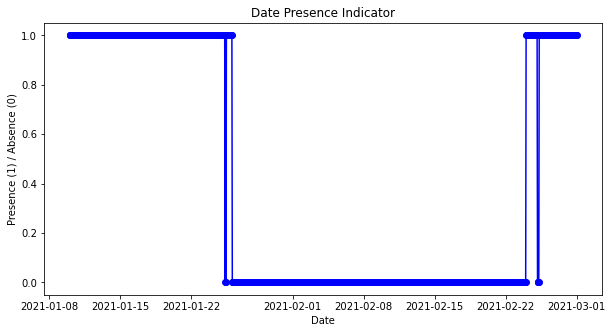

In [67]:
start_date = '2021-01-10'
end_date = '2021-03-01'

date_range = pd.date_range(start=start_date, end=end_date, freq='H')

# Filter the DataFrame for the specific counter_name
filtered_df = test[test["counter_name"] == "152 boulevard du Montparnasse E-O"]

# Extract the unique dates from the filtered DataFrame
existing_dates = pd.to_datetime(filtered_df["date"]).dt.floor('H')

# Remove duplicates from existing_dates
existing_dates = existing_dates.drop_duplicates()

# Create a binary indicator column
date_indicator = pd.Series(1, index=existing_dates).reindex(date_range, fill_value=0)

# Plot the binary indicator
plt.figure(figsize=(10, 5))
plt.plot(date_indicator, marker='o', linestyle='-', color='b')
plt.title('Date Presence Indicator')
plt.xlabel('Date')
plt.ylabel('Presence (1) / Absence (0)')
plt.show()

In [34]:
filtered_df

counter_id               counter_name    site_id  \
4       100063175-353277233  20 Avenue de Clichy NO-SE  100063175   
58      100063175-353277233  20 Avenue de Clichy NO-SE  100063175   
112     100063175-353277233  20 Avenue de Clichy NO-SE  100063175   
166     100063175-353277233  20 Avenue de Clichy NO-SE  100063175   
220     100063175-353277233  20 Avenue de Clichy NO-SE  100063175   
...                     ...                        ...        ...   
579711  100063175-353277233  20 Avenue de Clichy NO-SE  100063175   
579767  100063175-353277233  20 Avenue de Clichy NO-SE  100063175   
579823  100063175-353277233  20 Avenue de Clichy NO-SE  100063175   
579879  100063175-353277233  20 Avenue de Clichy NO-SE  100063175   
579935  100063175-353277233  20 Avenue de Clichy NO-SE  100063175   

                  site_name                date counter_installation_date  \
4       20 Avenue de Clichy 2020-09-01 01:00:00                2020-07-22   
58      20 Avenue de Clichy 2020-09-01 02:00:00                2020-07-22   
112     20 Avenue de Clichy 2020-09-01 03:00:00                2020-07-22   
166     20 Avenue de Clichy 2020-09-01 04:00:00                2020-07-22   
220     20 Avenue de Clichy 2020-09-01 05:00:00                2020-07-22   
...                     ...                 ...                       ...   
579711  20 Avenue de Clichy 2021-09-09 19:00:00                2020-07-22   
579767  20 Avenue de Clichy 2021-09-09 20:00:00                2020-07-22   
579823  20 Avenue de Clichy 2021-09-09 21:00:00                2020-07-22   
579879  20 Avenue de Clichy 2021-09-09 22:00:00                2020-07-22   
579935  20 Avenue de Clichy 2021-09-09 23:00:00                2020-07-22   

       counter_technical_id  latitude  longitude  log_bike_count  
4               Y2H20073268  48.88529    2.32666        2.079442  
58              Y2H20073268  48.88529    2.32666        1.945910  
112             Y2H20073268  48.88529    2.32666        2.995732  
166             Y2H20073268  48.88529    2.32666        3.295837  
220             Y2H20073268  48.88529    2.32666        4.804021  
...                     ...       ...        ...             ...  
579711          Y2H20073268  48.88529    2.32666        5.111988  
579767          Y2H20073268  48.88529    2.32666        5.241747  
579823          Y2H20073268  48.88529    2.32666        5.236442  
579879          Y2H20073268  48.88529    2.32666        4.912655  
579935          Y2H20073268  48.88529    2.32666        4.488636  

[10459 rows x 10 columns]